In [85]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [86]:
data = pd.read_csv("./data/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [87]:
#Split the data in training and target
training_data = data.drop(columns="Outcome")
target = data["Outcome"]

In [88]:
#Prepare the data to feed the algorithm
x_train,x_test,y_train,y_test = train_test_split(training_data,target,test_size=.25)
#Create a scaler to normalize the data
scaler = StandardScaler()
#Normalize the data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Θα δοκιμάσουμε να πάρουμε ως Κ την ρίζα του Ν.Η συγκεκριμένη τεχνική ειναι αρκετά διαδεδομένη στους επιστήμονες δεδομένων και θεωρείται μια πολύ καλή λύση.


In [89]:
#square root of N

#Accuracy score of the classifier
print(accuracy_score(y_test,y_pred))
k = int(math.sqrt(len(y_test))) # K = 13
#Create the classifier
classifier = KNeighborsClassifier(n_neighbors=k,metric='euclidean',n_jobs=-1)
#Train with the training data
classifier.fit(x_train,y_train)
#Predict
y_pred = classifier.predict(x_test)


0.5677083333333334


# Calculate the optimal K for the KNN Classifier

In [90]:
error = {}
for i in range(1,30):
    classifier = KNeighborsClassifier(n_neighbors=i,metric="euclidean",n_jobs=-1)
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    error[i] = accuracy_score(y_test,y_pred)
error

{1: 0.6875,
 2: 0.6822916666666666,
 3: 0.7291666666666666,
 4: 0.7083333333333334,
 5: 0.7447916666666666,
 6: 0.71875,
 7: 0.7760416666666666,
 8: 0.75,
 9: 0.7604166666666666,
 10: 0.7708333333333334,
 11: 0.7864583333333334,
 12: 0.765625,
 13: 0.7760416666666666,
 14: 0.7447916666666666,
 15: 0.75,
 16: 0.7604166666666666,
 17: 0.7604166666666666,
 18: 0.7604166666666666,
 19: 0.7760416666666666,
 20: 0.7708333333333334,
 21: 0.78125,
 22: 0.7760416666666666,
 23: 0.78125,
 24: 0.78125,
 25: 0.78125,
 26: 0.78125,
 27: 0.7760416666666666,
 28: 0.7708333333333334,
 29: 0.7708333333333334}

Με αυτόν τον τρόπο πήραμε ένα λεξικό με τις τιμές του accuracy score  για κάθε K από το 1 εώς το 29

# PLOT

Text(0, 0.5, 'Accuracy score')

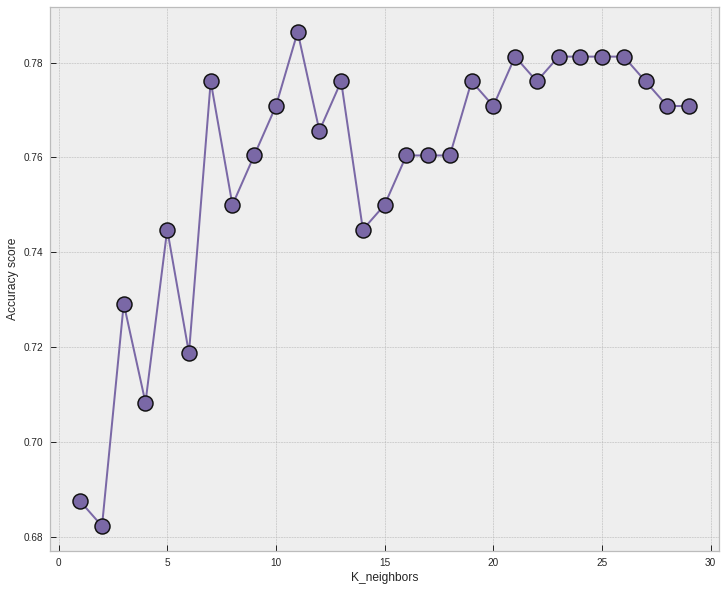

In [91]:
plt.style.use('bmh')
plt.figure(figsize=(12,10))
plt.plot(list(error.keys()),list(error.values()),c = 'C2',marker = 'o',markersize=15,mec= 'k',mew= 1.5)
plt.xlabel("K_neighbors")
plt.ylabel("Accuracy score")

Με αυτόν τον τρόπο μπορούμε να δούμε αναλυτικά το σφάλμα για κάθε Κ όμως αυτός ο τρόπος που το υπολογίσαμε σε περίπτωση που είχαμε μεγάλο όγκο δεδομένων θα ήταν πάρα πολύ χρονοβόρος.